In [1]:
!pip install pydataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.9 MB 4.5 MB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=c8ea540927f8156cbdcab5591700de0e8c8d4577eb75f4d26a117743fbd313c9
  Stored in directory: /root/.cache/pip/wheels/d7/e5/36/85d319586b4a405d001029d489102f526ce5546248c295932a
Successfully built pydataset


In [39]:
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
df = data('turnout').dropna()
df

,race,age,educate,income,vote
1,white,60,14.0,3.3458,1
2,white,51,10.0,1.8561,0
3,white,24,12.0,0.6304,0
4,white,38,8.0,3.4183,1
5,white,25,12.0,2.7852,1
...,...,...,...,...,...
1996,white,26,16.0,3.3834,0
1997,white,34,12.0,2.9170,1
1998,white,51,16.0,7.8949,1
1999,white,22,10.0,2.4811,0


In [25]:
df.drop(['race'],axis = 1 , inplace = True)
df

,age,educate,income,vote
1,60,14.0,3.3458,1
2,51,10.0,1.8561,0
3,24,12.0,0.6304,0
4,38,8.0,3.4183,1
5,25,12.0,2.7852,1
...,...,...,...,...
1996,26,16.0,3.3834,0
1997,34,12.0,2.9170,1
1998,51,16.0,7.8949,1
1999,22,10.0,2.4811,0


In [ ]:
X = df.drop('income' , axis = 1 )
y = df.iloc[: , -1]


In [29]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.33 , random_state = 1 )

In [30]:
model = KNeighborsRegressor()
model.fit(x_train , y_train)

KNeighborsRegressor()

In [ ]:
y_predict = model.predict(x_test)
y_predict

In [44]:
np.corrcoef(y_predict , y_test)


array([[1.        , 0.77475381],
       [0.77475381, 1.        ]])

In [34]:
accuracy = round(mean_absolute_error(y_test , y_predict),5)
accuracy

0.14091

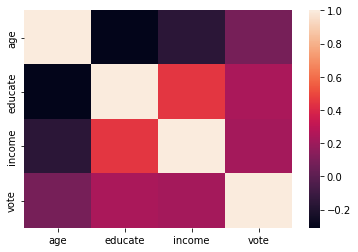

In [42]:
sns.heatmap(df.corr())